# **Machine Learning Assignment**

setting up pyprind & other packages

In [0]:
!pip install pyprind

In [0]:
!pip show tensorflow

Name: tensorflow
Version: 2.2.0rc3
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: astunparse, scipy, gast, tensorflow-estimator, termcolor, tensorboard, wrapt, wheel, google-pasta, keras-preprocessing, protobuf, grpcio, six, h5py, numpy, opt-einsum, absl-py
Required-by: fancyimpute


In [0]:
import pandas as pd
from keras import Sequential
from keras import layers
from keras import regularizers
import numpy as np
from string import punctuation
import pyprind
from collections import Counter
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import preprocessing
import os

Using TensorFlow backend.


In [0]:
#@title Mounting Drive
import os
os.chdir('/content/drive/My Drive/Machine Learning/Project/')

In [0]:
# for reproducability
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

In [0]:
#@title Spearman Function
def Get_score(Y_pred,Y_true):    
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])

**XGBoost Model & Libraries**

In [0]:
!pip install xgboost  

from numpy import loadtxt   
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import ensemble


In [0]:
# load labels and captions 
def read_caps(fname):
    """Load the captions into a dataframe"""
    vn = []
    cap = []
    df = pd.DataFrame();
    with open(fname) as f:
        for line in f:
            pairs = line.split()
            vn.append(pairs[0])
            cap.append(pairs[1])
        df['video']=vn
        df['caption']=cap
    return df


# load the captions txt file
cap_path = './dev-set_video-captions.txt'
df_cap=read_caps(cap_path)

# load the ground truth values from csv file
label_path = './'
labels=pd.read_csv(label_path+'ground-truth.csv')

In [0]:
print(df_cap)

               video                                            caption
0        video3.webm                 blonde-woman-is-massaged-tilt-down
1        video4.webm  roulette-table-spinning-with-ball-in-closeup-shot
2        video6.webm                                      khr-gangsters
3        video8.webm               medical-helicopter-hovers-at-airport
4       video10.webm               couple-relaxing-on-picnic-crane-shot
...              ...                                                ...
5995  video7488.webm        beautiful-young-woman-in-front-of-fountains
5996  video7489.webm  focus-pull-from-molting-penguin-to-penguin-col...
5997  video7491.webm           students-walking-in-university-of-mexico
5998  video7492.webm                       beautiful-black-woman-at-spa
5999  video7493.webm  beautiful-modern-brunette-woman-using-tablet-c...

[6000 rows x 2 columns]


In [0]:
print(labels)

               video  ...  nb_long-term_annotations
0        video3.webm  ...                        13
1        video4.webm  ...                        12
2        video6.webm  ...                        10
3        video8.webm  ...                        11
4       video10.webm  ...                        10
...              ...  ...                       ...
5995  video7488.webm  ...                         9
5996  video7489.webm  ...                        31
5997  video7491.webm  ...                        11
5998  video7492.webm  ...                        16
5999  video7493.webm  ...                        13

[6000 rows x 5 columns]


In [0]:
counts = Counter()
# setup prograss tracker
pbar = pyprind.ProgBar(len(df_cap['caption']), title='Counting word occurrences')
for i, cap in enumerate(df_cap['caption']):
    # replace punctuations with space
    # convert words to lower case 
    text = ''.join([c if c not in punctuation else ' ' for c in cap]).lower()
    df_cap.loc[i,'caption'] = text
    pbar.update()
    counts.update(text.split())

Counting word occurrences
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


In [0]:
print(counts)


Counter({'in': 2105, 'the': 1835, 'on': 1724, 'and': 1444, 'a': 1181, 'with': 996, 'woman': 899, 'of': 836, 'at': 762, 'young': 724, 'man': 559, 'slow': 495, 'motion': 452, 'to': 416, 'couple': 318, 'sitting': 304, 'girl': 291, 'happy': 279, 'beach': 270, 'park': 256, 'up': 255, 'walking': 237, 'close': 230, 'camera': 230, 'her': 219, 'using': 218, 'shot': 215, 'smiling': 198, 'looking': 195, 'two': 191, 'by': 189, 'people': 188, 'from': 188, 'tablet': 184, 'is': 181, 'water': 171, 'through': 156, 'female': 150, 'computer': 149, 'view': 149, 'laptop': 139, 'playing': 137, 'sunset': 137, 'beautiful': 133, 'videoblocks': 131, 'his': 131, 'running': 130, 'talking': 129, 'city': 128, 'working': 127, 'eating': 126, 'little': 126, 'family': 125, 'mother': 124, 'background': 122, 'home': 122, 'standing': 121, 'for': 115, 'phone': 115, 'or': 114, 'sea': 113, 'national': 112, 'african': 111, 'attractive': 111, 'tree': 107, 'snow': 103, 'their': 102, 'drinking': 102, 'hands': 102, 'steadicamof':

In [0]:
print(len(counts))

5191


In [0]:
df_cap.head()

,video,caption
0,video3.webm,blonde woman is massaged tilt down
1,video4.webm,roulette table spinning with ball in closeup shot
2,video6.webm,khr gangsters
3,video8.webm,medical helicopter hovers at airport
4,video10.webm,couple relaxing on picnic crane shot


Maping each unique word to an integer (one-hot encoding)




In [0]:
len_token = len(counts)
tokenizer = Tokenizer(num_words=len_token)
print(len_token)

5191


In [0]:
tokenizer.fit_on_texts(list(df_cap.caption.values)) #fit a list of captions to the tokenizer
#the tokenizer vectorizes a text corpus, by turning each text into either a sequence of integers

In [0]:
one_hot_res = tokenizer.texts_to_matrix(list(df_cap.caption.values),mode='binary')
sequences = tokenizer.texts_to_sequences(list(df_cap.caption.values))

In [0]:
max_len = 50

In [0]:
X_seq = np.zeros((len(sequences),max_len)) 
for i in range(len(sequences)):
    n = len(sequences[i])
    if n==0:
        print(i)
    else:
        X_seq[i,-n:] = sequences[i]
X_seq.shape

(6000, 50)

Creating a dataframe with the sequences & merging it with the captions dataframe

In [0]:
df_seq = pd.DataFrame(X_seq)    
df_seq = pd.concat([df_cap, df_seq], axis = 1)   
df_seq = df_seq.drop("caption", axis=1)  
print(df_seq)  

               video    0    1    2    3  ...     45     46      47     48      49
0        video3.webm  0.0  0.0  0.0  0.0  ...    7.0   35.0   884.0  384.0    91.0
1        video4.webm  0.0  0.0  0.0  0.0  ...    6.0  213.0     1.0   89.0    27.0
2        video6.webm  0.0  0.0  0.0  0.0  ...    0.0    0.0     0.0  131.0   312.0
3        video8.webm  0.0  0.0  0.0  0.0  ...  725.0  993.0  3098.0    9.0   165.0
4       video10.webm  0.0  0.0  0.0  0.0  ...  118.0    3.0   515.0  356.0    27.0
...              ...  ...  ...  ...  ...  ...    ...    ...     ...    ...     ...
5995  video7488.webm  0.0  0.0  0.0  0.0  ...    7.0    1.0   183.0    8.0  1240.0
5996  video7489.webm  0.0  0.0  0.0  0.0  ...    1.0  961.0   324.0  134.0   119.0
5997  video7491.webm  0.0  0.0  0.0  0.0  ...   22.0    1.0  2867.0    8.0  2968.0
5998  video7492.webm  0.0  0.0  0.0  0.0  ...   44.0  102.0     7.0    9.0   446.0
5999  video7493.webm  0.0  0.0  0.0  0.0  ...   34.0   39.0     1.0  872.0   222.0

[60

Reading C3D Vectors & video names in the dataframe 

In [0]:
def read_C3D(fname):  
    with open(fname) as f:
        for line in f:
            C3D =[float(item) for item in line.split()] 
    return C3D

def vname2ID(vnames): 
    vid = [ os.path.splitext(vn)[0]+'.webm' for vn in vnames]
    return vid

In [0]:
#@title Extraction of video labels and C3D Feature
Feat_path = './Features/'    

vid = labels.video.values  

c3d_features = pd.DataFrame({'video': vid,
                   'C3D': [read_C3D(Feat_path+'C3D'+'/'+os.path.splitext(item)[0]+'.txt') for item in vid],
                       }) 

In [0]:
print(c3d_features)

               video                                                C3D
0        video3.webm  [0.02024942, 0.0015778, 0.00082625, 0.00094509...
1        video4.webm  [0.000118, 0.00089075, 0.00018769, 4.543e-05, ...
2        video6.webm  [0.01176522, 0.00074577, 0.00078353, 1.328e-05...
3        video8.webm  [0.00022343, 0.00016499, 7.35e-06, 1.615e-05, ...
4       video10.webm  [9.006e-05, 0.00061494, 0.00343634, 0.00128092...
...              ...                                                ...
5995  video7488.webm  [0.35724622, 0.07598178, 0.00302532, 2.772e-05...
5996  video7489.webm  [0.19280288, 0.00093812, 0.00506054, 1.35e-06,...
5997  video7491.webm  [2.589e-05, 0.00012192, 2.781e-05, 2.608e-05, ...
5998  video7492.webm  [0.26509121, 0.09653918, 5.971e-05, 0.00022735...
5999  video7493.webm  [0.02058949, 0.00122141, 0.00206607, 0.0023161...

[6000 rows x 2 columns]


merging captions sequences and C3D features on the video column

In [0]:
f1 = pd.DataFrame(c3d_features.C3D.apply(pd.Series))  
f2 = pd.concat([c3d_features, f1], axis = 1) 
f2 = f2.drop("C3D", axis=1) 
df_f = pd.merge(df_seq, f2, on='video')
df_f = df_f.drop('video', axis = 1)  

In [0]:
print (df_f)

      0_x  1_x  2_x  3_x  ...        97        98        99       100
0     0.0  0.0  0.0  0.0  ...  0.000537  0.000339  0.008437  0.000470
1     0.0  0.0  0.0  0.0  ...  0.000360  0.000159  0.001025  0.000020
2     0.0  0.0  0.0  0.0  ...  0.000064  0.005380  0.001027  0.001384
3     0.0  0.0  0.0  0.0  ...  0.000001  0.000004  0.000380  0.000029
4     0.0  0.0  0.0  0.0  ...  0.000061  0.000075  0.000002  0.001323
...   ...  ...  ...  ...  ...       ...       ...       ...       ...
5995  0.0  0.0  0.0  0.0  ...  0.000039  0.000943  0.000421  0.001512
5996  0.0  0.0  0.0  0.0  ...  0.000004  0.000003  0.000166  0.000046
5997  0.0  0.0  0.0  0.0  ...  0.000047  0.007159  0.004958  0.000892
5998  0.0  0.0  0.0  0.0  ...  0.000083  0.000108  0.001268  0.000710
5999  0.0  0.0  0.0  0.0  ...  0.000336  0.000828  0.004901  0.001185

[6000 rows x 151 columns]


**Loading Test Caption File**

In [0]:
test_cap_path = './Test/Captions_test/test-set-1_video-captions.txt'
df_test_cap=read_caps(test_cap_path)

In [0]:
print(df_test_cap)

                video                                            caption
0      video7494.webm     green-jeep-struggling-to-drive-over-huge-rocks
1      video7495.webm  hiking-woman-tourist-is-walking-forward-in-mou...
2      video7496.webm  close-up-of-african-american-doctors-hands-usi...
3      video7497.webm  slow-motion-of-a-man-using-treadmill-in-the-gy...
4      video7498.webm       slow-motion-of-photographer-in-national-park
...               ...                                                ...
1995  video10004.webm  astronaut-in-outer-space-against-the-backdrop-...
1996  video10005.webm  young-women-lying-on-sunbed-and-applying-sun-c...
1997  video10006.webm  doctor-talking-to-patient-using-a-tablet-to-ex...
1998  video10007.webm  businessman-sitting-on-the-beach-on-inflatable...
1999  video10008.webm  woman-eating-ice-cream-and-sitting-in-the-stre...

[2000 rows x 2 columns]


In [0]:
#@title Loading Testing Data 
test_path = './Test/'


vid = df_test_cap.video.values  

Features_test = pd.DataFrame({'video': vid,
                   'C3D': [read_C3D(test_path+'C3D_test'+'/'+os.path.splitext(item)[0]+'.txt') for item in vid],
                       })

X_test = np.stack(Features_test['C3D'].values)

In [0]:
print(Features_test)

                video                                                C3D
0      video7494.webm  [0.00013576, 0.0002133, 0.00124759, 1.149e-05,...
1      video7495.webm  [0.00012659, 2.377e-05, 0.04950115, 2.418e-05,...
2      video7496.webm  [0.48898152, 0.00058536, 2.454e-05, 0.00016031...
3      video7497.webm  [0.24925078, 0.00101763, 8.02e-06, 1.92e-05, 2...
4      video7498.webm  [0.00989415, 3.413e-05, 0.00261261, 2.1e-06, 1...
...               ...                                                ...
1995  video10004.webm  [0.05058656, 0.00623968, 0.11702564, 0.0005364...
1996  video10005.webm  [0.00038171, 6.61e-05, 2.447e-05, 3.05e-06, 1....
1997  video10006.webm  [0.59629649, 0.03444825, 0.0009805, 6e-08, 1e-...
1998  video10007.webm  [0.00025415, 0.00021214, 0.02341845, 0.0104768...
1999  video10008.webm  [0.12241518, 0.86923975, 4.575e-05, 3.9e-07, 4...

[2000 rows x 2 columns]


In [0]:
counts = Counter()
# setup prograss tracker
pbar = pyprind.ProgBar(len(df_test_cap['caption']), title='Counting word occurrences')
for i, cap in enumerate(df_test_cap['caption']):
    # replace punctuations with space
    # convert words to lower case 
    text = ''.join([c if c not in punctuation else ' ' for c in cap]).lower()
    df_test_cap.loc[i,'caption'] = text
    pbar.update()
    counts.update(text.split())

Counting word occurrences
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


In [0]:
len_token = len(counts)
tokenizer = Tokenizer(num_words=len_token)
print(len_token)

3197


In [0]:
tokenizer.fit_on_texts(list(df_test_cap.caption.values))

Maping each unique word to an integer (one-hot encoding)

In [0]:
one_hot_res = tokenizer.texts_to_matrix(list(df_test_cap.caption.values),mode='binary')
test_sequences = tokenizer.texts_to_sequences(list(df_test_cap.caption.values))

In [0]:
X_test_seq = np.zeros((len(test_sequences),max_len))
for i in range(len(test_sequences)):
    n = len(test_sequences[i])
    if n==0:
        print(i)
    else:
        X_test_seq[i,-n:] = test_sequences[i]
X_test_seq.shape

(2000, 50)

Creating a dataframe with the sequences & merging it with the captions dataframe

In [0]:
df_test_seq = pd.DataFrame(X_test_seq)   
df_test_seq = pd.concat([df_test_cap, df_test_seq], axis = 1)   
df_test_seq = df_test_seq.drop("caption", axis=1) 

In [0]:
print(df_test_seq)

                video    0    1    2  ...      46      47      48      49
0      video7494.webm  0.0  0.0  0.0  ...  1089.0    66.0   428.0   283.0
1      video7495.webm  0.0  0.0  0.0  ...     6.0    27.0    13.0    14.0
2      video7496.webm  0.0  0.0  0.0  ...    12.0  1091.0  1607.0  1092.0
3      video7497.webm  0.0  0.0  0.0  ...    34.0     7.0   805.0  1610.0
4      video7498.webm  0.0  0.0  0.0  ...  1611.0     1.0    76.0    19.0
...               ...  ...  ...  ...  ...     ...     ...     ...     ...
1995  video10004.webm  0.0  0.0  0.0  ...   406.0   716.0    31.0   717.0
1996  video10005.webm  0.0  0.0  0.0  ...     4.0  1043.0    92.0   189.0
1997  video10006.webm  0.0  0.0  0.0  ...    12.0   928.0    27.0  1289.0
1998  video10007.webm  0.0  0.0  0.0  ...     4.0    37.0     2.0    56.0
1999  video10008.webm  0.0  0.0  0.0  ...     1.0     3.0    77.0   135.0

[2000 rows x 51 columns]


merging captions test sequences and C3D test features on the video column

In [0]:
f_test1 = pd.DataFrame(Features_test.C3D.apply(pd.Series))
print (f_test1)

           0         1         2    ...       98        99        100
0     0.000136  0.000213  0.001248  ...  0.000006  0.000210  0.195120
1     0.000127  0.000024  0.049501  ...  0.000016  0.000010  0.000392
2     0.488982  0.000585  0.000025  ...  0.000067  0.000123  0.000015
3     0.249251  0.001018  0.000008  ...  0.000015  0.000707  0.000010
4     0.009894  0.000034  0.002613  ...  0.001402  0.000745  0.000456
...        ...       ...       ...  ...       ...       ...       ...
1995  0.050587  0.006240  0.117026  ...  0.000371  0.005023  0.051066
1996  0.000382  0.000066  0.000024  ...  0.000015  0.000080  0.000083
1997  0.596296  0.034448  0.000981  ...  0.003013  0.001025  0.000010
1998  0.000254  0.000212  0.023418  ...  0.004014  0.000790  0.000374
1999  0.122415  0.869240  0.000046  ...  0.000002  0.000073  0.000041

[2000 rows x 101 columns]


In [0]:
f_test2 = pd.concat([Features_test, f_test1], axis = 1)  
f_test2 = f_test2.drop("C3D", axis=1) 
print (f_test2)

                video         0         1  ...        98        99       100
0      video7494.webm  0.000136  0.000213  ...  0.000006  0.000210  0.195120
1      video7495.webm  0.000127  0.000024  ...  0.000016  0.000010  0.000392
2      video7496.webm  0.488982  0.000585  ...  0.000067  0.000123  0.000015
3      video7497.webm  0.249251  0.001018  ...  0.000015  0.000707  0.000010
4      video7498.webm  0.009894  0.000034  ...  0.001402  0.000745  0.000456
...               ...       ...       ...  ...       ...       ...       ...
1995  video10004.webm  0.050587  0.006240  ...  0.000371  0.005023  0.051066
1996  video10005.webm  0.000382  0.000066  ...  0.000015  0.000080  0.000083
1997  video10006.webm  0.596296  0.034448  ...  0.003013  0.001025  0.000010
1998  video10007.webm  0.000254  0.000212  ...  0.004014  0.000790  0.000374
1999  video10008.webm  0.122415  0.869240  ...  0.000002  0.000073  0.000041

[2000 rows x 102 columns]


In [0]:
df_test_f = pd.merge(df_test_seq, f_test2, on='video')
df_test_f = df_test_f.drop('video', axis = 1)
print(df_test_f)

      0_x  1_x  2_x  3_x  ...            97        98        99       100
0     0.0  0.0  0.0  0.0  ...  5.840000e-06  0.000006  0.000210  0.195120
1     0.0  0.0  0.0  0.0  ...  3.619300e-04  0.000016  0.000010  0.000392
2     0.0  0.0  0.0  0.0  ...  2.600000e-07  0.000067  0.000123  0.000015
3     0.0  0.0  0.0  0.0  ...  9.100000e-07  0.000015  0.000707  0.000010
4     0.0  0.0  0.0  0.0  ...  8.260000e-06  0.001402  0.000745  0.000456
...   ...  ...  ...  ...  ...           ...       ...       ...       ...
1995  0.0  0.0  0.0  0.0  ...  5.321400e-04  0.000371  0.005023  0.051066
1996  0.0  0.0  0.0  0.0  ...  6.400000e-07  0.000015  0.000080  0.000083
1997  0.0  0.0  0.0  0.0  ...  5.900000e-07  0.003013  0.001025  0.000010
1998  0.0  0.0  0.0  0.0  ...  5.253410e-03  0.004014  0.000790  0.000374
1999  0.0  0.0  0.0  0.0  ...  2.600000e-07  0.000002  0.000073  0.000041

[2000 rows x 151 columns]


In [0]:
Y_st = labels['short-term_memorability'].values 
Y_lt = labels['long-term_memorability'].values  
X = df_f.values 

**Splitting short term and long term with test size 10%**

In [0]:
X_train_st, X_test_st, Y_train_st, Y_test_st = train_test_split(X,Y_st, test_size=0.1, random_state = 0) 
X_train_lt, X_test_lt, Y_train_lt, Y_test_lt = train_test_split(X,Y_lt, test_size=0.1, random_state = 0) 

Short Term train and test values

In [0]:
print('X_train', X_train_st.shape)
print('X_test', X_test_st.shape)
print('Y_train', Y_train_st.shape)
print('Y_test', Y_test_st.shape)

X_train (5400, 151)
X_test (600, 151)
Y_train (5400,)
Y_test (600,)


Long Term train and test values 

In [0]:
print('X_train', X_train_lt.shape)
print('X_test', X_test_lt.shape)
print('Y_train', Y_train_lt.shape)
print('Y_test', Y_test_lt.shape)

X_train (5400, 151)
X_test (600, 151)
Y_train (5400,)
Y_test (600,)


# **Model Exploration**

In [0]:
#@title Linear Regression 
from sklearn.linear_model import LinearRegression
LMregressor = LinearRegression()
LMregressor.fit(X_train_st, Y_train_st)
LMregressor.fit(X_train_lt, Y_train_lt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#@title Spearman's Correlation Coefficient (Linear Regressor)
print('Short Term:')
print(Get_score(LMregressor.predict(X_test_st), Y_test_st))
print('Long Term:')
print(Get_score(LMregressor.predict(X_test_lt), Y_test_lt))

Short Term:
The Spearman's correlation coefficient is: 0.187
None
Long Term:
The Spearman's correlation coefficient is: 0.047
None


In [0]:
#@title Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train_st, Y_train_st)
DTregressor.fit(X_train_lt, Y_train_lt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
#@title Spearman's Correlation Cofficient (Decision Tree)
print('Short Term:')
print(Get_score(DTregressor.predict(X_test_st), Y_test_st))
print('Long Term:')
print(Get_score(DTregressor.predict(X_test_lt), Y_test_lt))

Short Term:
The Spearman's correlation coefficient is: 0.007
None
Long Term:
The Spearman's correlation coefficient is: -0.007
None


In [0]:
#@title Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators=500)
RFregressor.fit(X_train_st, Y_train_st)
RFregressor.fit(X_train_lt, Y_train_lt)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
#@title Spearman's Correlation Coefficient (Random Forest Regressor)
print('Short Term:')
print(Get_score(RFregressor.predict(X_test_st), Y_test_st))
print('Long Term:')
print(Get_score(RFregressor.predict(X_test_lt), Y_test_lt))

Short Term:
The Spearman's correlation coefficient is: 0.264
None
Long Term:
The Spearman's correlation coefficient is: 0.132
None


In [0]:
#@title Bayesian Ridge 
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge
params = {'n_iter' :500, 'tol':0.001, 'compute_score' :'False', 'fit_intercept' :'True', 'normalize' :'False'}
clf = linear_model.BayesianRidge(**params)
clf.fit(X_train_st, Y_train_st)
clf.fit(X_train_lt, Y_train_lt)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score='False', copy_X=True, fit_intercept='True',
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=500,
              normalize='False', tol=0.001, verbose=False)

In [0]:
#@title Spearman's Correlation Coefficient (Bayesian Ridge)
print('Short Term:')
print(Get_score(clf.predict(X_test_st), Y_test_st))
print('Long Term:')
print(Get_score(clf.predict(X_test_lt), Y_test_lt))

Short Term:
The Spearman's correlation coefficient is: 0.222
None
Long Term:
The Spearman's correlation coefficient is: 0.088
None


In [0]:
#@title **Gradient Boosting Regressor** 

params = {'n_estimators':500, 'max_depth':12, 'min_samples_split':2, 'learning_rate':0.02, 'loss':'lad'}
clf = ensemble.GradientBoostingRegressor(**params)


In [0]:
clf.fit(X_train_st, Y_train_st)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='lad',
                          max_depth=12, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
print('Short Term:')
print(Get_score(clf.predict(X_test_st), Y_test_st))


Short Term:
The Spearman's correlation coefficient is: 0.289
None


In [0]:
clf.fit(X_train_lt, Y_train_lt)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='lad',
                          max_depth=12, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Combining Both short-term and long-term together

In [0]:
print('Long Term:')
print(Get_score(clf.predict(X_test_lt), Y_test_lt))

Long Term:
The Spearman's correlation coefficient is: 0.122
None


In [0]:
short_term = pd.DataFrame(clf.predict(X_test_st))
short_term.columns = ['x']
long_term = pd.DataFrame(clf.predict(X_test_lt))
long_term.columns = ['y']


short_termlong_term = pd.concat([short_term, long_term], axis=1)

print(short_termlong_term)

            x         y
0    0.776907  0.776907
1    0.784639  0.784639
2    0.739765  0.739765
3    0.833700  0.833700
4    0.748153  0.748153
..        ...       ...
595  0.727626  0.727626
596  0.772375  0.772375
597  0.789865  0.789865
598  0.866345  0.866345
599  0.712576  0.712576

[600 rows x 2 columns]


In [0]:
Y_pred_train = clf.predict(X_train_st)
Y = labels['short-term_memorability'].values
Y_train = Y_train_st
Y_pred_val = clf.predict(X_test_st)
X = df_f.values
Y_val = Y_test_st

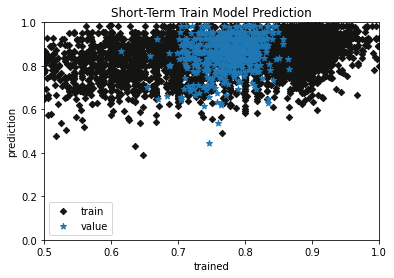

In [0]:
#@title Scatter Plot for the Trained vs Test Set for Short-Term Model
plt.figure()
plt.scatter(Y_pred_train,Y_train, s= 20, marker='D',c='#141413',label='train', alpha = 1)
plt.scatter(Y_pred_val,Y_val, s=40, marker='*',c='#1f77b4',label='value', alpha = 1)
    
plt.xlim([0.5,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel('trained')
plt.ylabel('prediction')
plt.title('Short-Term Train Model Prediction')
plt.show()

In [0]:
Y_pred_train = clf.predict(X_train_lt)
Y = labels['long-term_memorability'].values
Y_train = Y_train_lt
Y_pred_val = clf.predict(X_test_lt)
X = df_f.values
Y_val = Y_test_lt

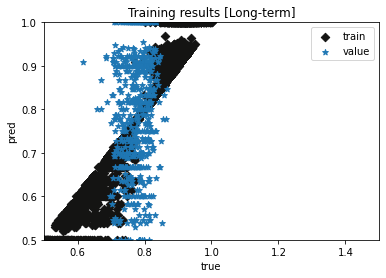

In [0]:
#@title Scatter Plot for the Trained vs Test Set for Long-Term Model
plt.figure()
plt.scatter(Y_pred_train,Y_train,marker='D',c='#141413',label='train', alpha = 1)
plt.scatter(Y_pred_val,Y_val,marker='*',c='#1f77b4',label='value', alpha = 1)
plt.xlim([0.5,1.5])
plt.ylim([0.5,1])
plt.legend()
plt.xlabel('true')
plt.ylabel('pred')
plt.title('Training results [Long-term]')
plt.show()

In [0]:
X_full_train = df_f.values
Y_full_train_st = labels['short-term_memorability'].values    
Y_full_train_lt = labels['long-term_memorability'].values

In [0]:
print('X_train', X_full_train.shape)
print('Y_train lt', Y_full_train_lt.shape)
print('Y_train st', Y_full_train_st.shape)

X_train (6000, 151)
Y_train lt (6000,)
Y_train st (6000,)


# **Gradient Boosting Regressor on Full Data**



1.  Decision Trees- 500
2.  Learning Rate - 0.2



In [0]:
#@title Gradient Boosting Regressor on Full Data
params = {'n_estimators':500, 'max_depth':10, 'min_samples_split':4, 'learning_rate':0.02, 'loss':'lad'}
clf_final_st = ensemble.GradientBoostingRegressor(**params)

In [0]:
clf_final_st.fit(X_full_train, Y_full_train_st)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='lad',
                          max_depth=10, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
#@title Short-Term Prediction on Full Data
prediction_st = clf_final_st.predict(df_test_f)
print('short term:')
print(prediction_st)

short term:
[0.85733415 0.84284858 0.89223931 ... 0.89544529 0.82736326 0.88279116]


In [0]:
params = {'n_estimators':500, 'max_depth':10, 'min_samples_split':4, 'learning_rate':0.02, 'loss':'lad'}
clf_final_lt = ensemble.GradientBoostingRegressor(**params)

In [0]:
clf_final_lt.fit(X_full_train, Y_full_train_lt)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='lad',
                          max_depth=10, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
#@title Long-Term Prediction on Full Data
prediction_lt = clf_final_lt.predict(df_test_f)
print('long term:')
print(prediction_lt)

long term:
[0.81888474 0.73990227 0.82352858 ... 0.813547   0.76772462 0.81316091]


In [0]:
df_predictions_final_st = pd.DataFrame(prediction_st)
df_predictions_final_st.columns = ['short-term_memorability']
df_predictions_final_lt = pd.DataFrame(prediction_lt)
df_predictions_final_lt.columns = ['long-term_memorability']

In [0]:
print(df_predictions_final_st)

      short-term_memorability
0                    0.857334
1                    0.842849
2                    0.892239
3                    0.878095
4                    0.846941
...                       ...
1995                 0.875427
1996                 0.875801
1997                 0.895445
1998                 0.827363
1999                 0.882791

[2000 rows x 1 columns]


In [0]:
print(df_predictions_final_lt)

      long-term_memorability
0                   0.818885
1                   0.739902
2                   0.823529
3                   0.766176
4                   0.768519
...                      ...
1995                0.815810
1996                0.796322
1997                0.813547
1998                0.767725
1999                0.813161

[2000 rows x 1 columns]


In [0]:
my_predictions_st = pd.concat([df_test_cap, df_predictions_final_st], axis = 1)

In [0]:
print(my_predictions_st)

                video  ... short-term_memorability
0      video7494.webm  ...                0.857334
1      video7495.webm  ...                0.842849
2      video7496.webm  ...                0.892239
3      video7497.webm  ...                0.878095
4      video7498.webm  ...                0.846941
...               ...  ...                     ...
1995  video10004.webm  ...                0.875427
1996  video10005.webm  ...                0.875801
1997  video10006.webm  ...                0.895445
1998  video10007.webm  ...                0.827363
1999  video10008.webm  ...                0.882791

[2000 rows x 3 columns]


In [0]:
my_predictions_lt = pd.concat([df_test_cap, df_predictions_final_lt], axis = 1)

In [0]:
print(my_predictions_lt)

                video  ... long-term_memorability
0      video7494.webm  ...               0.818885
1      video7495.webm  ...               0.739902
2      video7496.webm  ...               0.823529
3      video7497.webm  ...               0.766176
4      video7498.webm  ...               0.768519
...               ...  ...                    ...
1995  video10004.webm  ...               0.815810
1996  video10005.webm  ...               0.796322
1997  video10006.webm  ...               0.813547
1998  video10007.webm  ...               0.767725
1999  video10008.webm  ...               0.813161

[2000 rows x 3 columns]


Merging both short-term & long-term predictions

In [0]:
df_predictions_f = pd.merge(my_predictions_st, my_predictions_lt, on='video')
df_predictions_f = df_predictions_f.drop("video", axis=1)
df_predictions_f = df_predictions_f.drop("caption_x", axis=1)

In [0]:
print(df_predictions_f)

      short-term_memorability  ... long-term_memorability
0                    0.857334  ...               0.818885
1                    0.842849  ...               0.739902
2                    0.892239  ...               0.823529
3                    0.878095  ...               0.766176
4                    0.846941  ...               0.768519
...                       ...  ...                    ...
1995                 0.875427  ...               0.815810
1996                 0.875801  ...               0.796322
1997                 0.895445  ...               0.813547
1998                 0.827363  ...               0.767725
1999                 0.882791  ...               0.813161

[2000 rows x 3 columns]


# **Migrating Data**

In [0]:
#@title Reading Ground-Truth_template.csv
template_path = './' 
template=pd.read_csv(label_path+'ground_truth_template.csv')  
template1 = pd.DataFrame(template)

In [0]:
print(template1)

      video  ...  nb_long-term_annotations
0      7494  ...                        12
1      7495  ...                        10
2      7496  ...                        13
3      7497  ...                        10
4      7498  ...                        10
...     ...  ...                       ...
1995  10004  ...                        17
1996  10005  ...                         9
1997  10006  ...                        12
1998  10007  ...                        12
1999  10008  ...                        10

[2000 rows x 5 columns]


Dropping same columns, merging the predictions and rearranging them

In [0]:
ground_truth_final_values = template1.drop('short-term_memorability', axis=1)   
ground_truth_final_values = ground_truth_final_values.drop('long-term_memorability', axis=1)   


ground_truth_final_values = pd.concat([ground_truth_final_values, df_predictions_f], axis = 1)   

ground_truth_final_values = ground_truth_final_values[['video', 'short-term_memorability','nb_short-term_annotations','long-term_memorability', 'nb_long-term_annotations']]  

In [0]:
print(ground_truth_final_values)

      video  ...  nb_long-term_annotations
0      7494  ...                        12
1      7495  ...                        10
2      7496  ...                        13
3      7497  ...                        10
4      7498  ...                        10
...     ...  ...                       ...
1995  10004  ...                        17
1996  10005  ...                         9
1997  10006  ...                        12
1998  10007  ...                        12
1999  10008  ...                        10

[2000 rows x 5 columns]


In [0]:
#@title Migrating Predictions to Final File
ground_truth_final_values.to_csv('ground_truth_final_values.csv')